# WeatherPy


In [1]:
import json
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import openweathermapy.core as ow

In [2]:
# Get random geo-coordinates 
lats = np.random.uniform(-90,90,1500)
longs = np.random.uniform(-180,180,1500)
zip_coord_cities = zip(lats, longs)


In [3]:
# Use citypy library for nearby cities
cities = []
for coordinate_pair in zip_coord_cities:
   lat, lon = coordinate_pair
   #city = citipy.nearest_city(lat, lon).city_name
   city = citipy.nearest_city(lat, lon)
   if city not in cities:
       cities.append(city)
print(len(cities))

619


In [4]:
# Create a dataframe for the cities list
cities_df = pd.DataFrame(cities)

In [5]:
# Get city name and corresponding country code
cities_name=[]
countrycode=[]
for city in cities:
    country = city.country_code
    name = city.city_name
    cities_name.append(name)
    countrycode.append(country)

cities_df['City']=cities_name
cities_df['Country']=countrycode
cities_df.head()

,0,City,Country
0,<citipy.citipy.City object at 0x000002075FF7CBE0>,qaanaaq,gl
1,<citipy.citipy.City object at 0x0000020760680400>,taoudenni,ml
2,<citipy.citipy.City object at 0x00000207615B3390>,richards bay,za
3,<citipy.citipy.City object at 0x00000207615A0FD0>,bredasdorp,za
4,<citipy.citipy.City object at 0x000002075FA45128>,liniere,ca


In [6]:
# Drop duplicate cities in 'City'
cities_df = cities_df.drop_duplicates("City")
cities_df.head()

,0,City,Country
0,<citipy.citipy.City object at 0x000002075FF7CBE0>,qaanaaq,gl
1,<citipy.citipy.City object at 0x0000020760680400>,taoudenni,ml
2,<citipy.citipy.City object at 0x00000207615B3390>,richards bay,za
3,<citipy.citipy.City object at 0x00000207615A0FD0>,bredasdorp,za
4,<citipy.citipy.City object at 0x000002075FA45128>,liniere,ca


In [7]:
api_key=""
cities_df["Latitude"] =""
cities_df["Temperature"] =""
cities_df["Humidity"] = ""
cities_df["Cloud Cover"] = ""
cities_df["Wind Speed"] = ""
cities_df["Date"] =""
cities_df.head()

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000002075FF7CBE0>,qaanaaq,gl,,,,,,
1,<citipy.citipy.City object at 0x0000020760680400>,taoudenni,ml,,,,,,
2,<citipy.citipy.City object at 0x00000207615B3390>,richards bay,za,,,,,,
3,<citipy.citipy.City object at 0x00000207615A0FD0>,bredasdorp,za,,,,,,
4,<citipy.citipy.City object at 0x000002075FA45128>,liniere,ca,,,,,,


In [8]:
print(len(cities))

619


In [27]:
# Get api-key for openweathermap current weather api
api_key = "8f1b9cd4a84af0404d4d40da7aa2636c"

# Loop through cities dataframe and run a weather search for each city
for index, row in cities_df.iterrows():
        url="http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["City"].replace(" ","+"), api_key)
        weather = req.get(url).json()
        try:
            cities_df.set_value(index, "Temperature", weather["main"]["temp"])
            cities_df.set_value(index, "Humidity", weather["main"]["humidity"])
            cities_df.set_value(index, "Cloud Cover", weather["clouds"]["all"])
            cities_df.set_value(index, "Wind Speed", weather["wind"]["speed"])
            cities_df.set_value(index, "Date", weather["dt"])
            cities_df.set_value(index, "Latitude", weather["coord"]["lat"])  
            
            print("City id: " + str(weather['id']) + " and City name: " + weather['name'])
            print(url) 
        
        except:
            print("Missing data. Skipping!!!")
               
        #weather_data.append(req.get(url).json())
#print(weather_data[0])

# Replace whitespaces in columns with NaN
# cities_df.replace(r'', np.NaN)  

# cities_df = cities_df.drop('0', 1)

# Remove all rows with NaN entries
#cities_df.dropna(how='any') 

# Fill NaN entries with 0

cities_df.fillna(0).head()

City id: 3831208 and City name: Qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2450173 and City name: Taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 962367 and City name: Richards Bay
http://api.openweathermap.org/data/2.5/weather?q=richards+bay&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1015776 and City name: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 3443341 and City name: Carmelo
http://api.openweathermap.org/data/2.5/weather?q=carmelo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 371745 and City name: Kutum
http://api.openweathermap.org/data/2.5/weather?q=kutum&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa

City id: 3418910 and City name: Upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1282256 and City name: Hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3899539 and City name: Antofagasta
http://api.openweathermap.org/data/2.5/weather?q=antofagasta&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2110227 and City name: Butaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1490256 and City name: Talnakh
http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2163355 and City name: Hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 15194

City id: 5924351 and City name: Clyde River
http://api.openweathermap.org/data/2.5/weather?q=clyde+river&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3863379 and City name: Mar del Plata
http://api.openweathermap.org/data/2.5/weather?q=mar+del+plata&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2444219 and City name: Goure
http://api.openweathermap.org/data/2.5/weather?q=goure&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2145554 and City name: Ulladulla
http://api.openweathermap.org/data/2.5/weather?q=ulladulla&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1701054 and City name: Marawi
http://api.openweathermap.org/data/2.5/weather?q=marawi&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3868633 and City name: Vallenar
http://api.openweathermap.org/data/2.5/weather?q=vallenar&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 26560

City id: 1786657 and City name: Yinchuan
http://api.openweathermap.org/data/2.5/weather?q=yinchuan&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3423146 and City name: Ilulissat
http://api.openweathermap.org/data/2.5/weather?q=ilulissat&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2141305 and City name: Fayaoue
http://api.openweathermap.org/data/2.5/weather?q=fayaoue&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2022572 and City name: Khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 5919850 and City name: Chapais
http://api.openweathermap.org/data/2.5/weather?q=chapais&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 884927 and City name: Mutoko
http://api.openweathermap.org/data/2.5/weather?q=mutoko&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3672086 and City nam

City id: 2185329 and City name: Waipawa
http://api.openweathermap.org/data/2.5/weather?q=waipawa&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1298911 and City name: Pyu
http://api.openweathermap.org/data/2.5/weather?q=pyu&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 1804979 and City name: Juegang
http://api.openweathermap.org/data/2.5/weather?q=juegang&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 480884 and City name: Tsilna
http://api.openweathermap.org/data/2.5/weather?q=tsilna&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 1651810 and City name: Airai
http://api.openweathermap.org/data/2.5/weather?q=airai&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3026644 and City name: Souillac
http://api.openweathermap.org/data/2.5/weather?q=souillac&units=IMPERIAL&mode=json&APPID=8f

City id: 3441894 and City name: Maldonado
http://api.openweathermap.org/data/2.5/weather?q=maldonado&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2449067 and City name: Timbuktu
http://api.openweathermap.org/data/2.5/weather?q=tombouctou&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3464724 and City name: Diamantino
http://api.openweathermap.org/data/2.5/weather?q=diamantino&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 2940231 and City name: Castrop-Rauxel
http://api.openweathermap.org/data/2.5/weather?q=castrop-rauxel&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 588365 and City name: Vao
http://api.openweathermap.org/data/2.5/weather?q=vao&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4033375 and City name: Tevaitoa
http://api.openweathermap.org/data/2.5/weather?q=tevaitoa&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d

City id: 3832791 and City name: Villa Carlos Paz
http://api.openweathermap.org/data/2.5/weather?q=villa+carlos+paz&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3934055 and City name: Chilca
http://api.openweathermap.org/data/2.5/weather?q=chilca&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1540711 and City name: Muravlenko
http://api.openweathermap.org/data/2.5/weather?q=muravlenko&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 287832 and City name: Ibra
http://api.openweathermap.org/data/2.5/weather?q=ibra&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 2660718 and City name: Fribourg
http://api.openweathermap.org/data/2.5/weather?q=fribourg&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4231997 and City name: Avera
http://api.openweathermap.org/data/2.5/weather?q=avera&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2

http://api.openweathermap.org/data/2.5/weather?q=huejuquilla+el+alto&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 6541934 and City name: Termoli
http://api.openweathermap.org/data/2.5/weather?q=termoli&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1337610 and City name: Thinadhoo
http://api.openweathermap.org/data/2.5/weather?q=thinadhoo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1852357 and City name: Shimoda
http://api.openweathermap.org/data/2.5/weather?q=shimoda&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 786562 and City name: Dukat
http://api.openweathermap.org/data/2.5/weather?q=dukat&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 359796 and City name: Suez
http://api.openweathermap.org/data/2.5/weather?q=suez&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3994912 and City name: Nochistlan
http://api.openweathermap.o

City id: 3404558 and City name: Cabedelo
http://api.openweathermap.org/data/2.5/weather?q=cabedelo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3374120 and City name: Vila do Maio
http://api.openweathermap.org/data/2.5/weather?q=vila+do+maio&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2121025 and City name: Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 164947 and City name: Salamiyah
http://api.openweathermap.org/data/2.5/weather?q=salamiyah&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2126710 and City name: Beringovskiy
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1106677 and City name: Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous+virieux&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0

City id: 3472284 and City name: Anastacio
http://api.openweathermap.org/data/2.5/weather?q=anastacio&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2027042 and City name: Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?q=batagay-alyta&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2633414 and City name: Yarmouth
http://api.openweathermap.org/data/2.5/weather?q=yarmouth&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2021017 and City name: Kysyl-Syr
http://api.openweathermap.org/data/2.5/weather?q=kysyl-syr&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3468352 and City name: Cacu
http://api.openweathermap.org/data/2.5/weather?q=cacu&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 1264976 and City name: Leh
http://api.openweathermap.org/data/2.5/weather?q=leh&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3420768 and City 

City id: 1687186 and City name: Sarangani
http://api.openweathermap.org/data/2.5/weather?q=sarangani&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 4712933 and City name: Mount Pleasant
http://api.openweathermap.org/data/2.5/weather?q=mount+pleasant&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 2063042 and City name: Port Hedland
http://api.openweathermap.org/data/2.5/weather?q=port+hedland&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 2446796 and City name: Bilma
http://api.openweathermap.org/data/2.5/weather?q=bilma&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
City id: 3622751 and City name: Naranjo
http://api.openweathermap.org/data/2.5/weather?q=naranjo&units=IMPERIAL&mode=json&APPID=8f1b9cd4a84af0404d4d40da7aa2636c
Missing data. Skipping!!!
City id: 2018735 and City name: Nyurba
http://api.openweathermap.org/data/2.5/weather?q=nyurba&units=IMPERIAL&mode=json

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000002075FF7CBE0>,qaanaaq,gl,77.48,-20.62,58.0,48.0,5.95,1521786662
1,<citipy.citipy.City object at 0x0000020760680400>,taoudenni,ml,22.68,45.99,30.0,0.0,8.41,1521786679
2,<citipy.citipy.City object at 0x00000207615B3390>,richards bay,za,-28.77,65.61,100.0,92.0,5.17,1521786741
3,<citipy.citipy.City object at 0x00000207615A0FD0>,bredasdorp,za,-34.53,63.00,98.0,0.0,13.22,1521786670
4,<citipy.citipy.City object at 0x000002075FA45128>,liniere,ca,0.00,0.00,0.0,0.0,0.00,


In [13]:
print(json.dumps(weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 68
    },
    "cod": 200,
    "coord": {
        "lat": 10.22,
        "lon": -71.33
    },
    "dt": 1521787203,
    "id": 3645527,
    "main": {
        "grnd_level": 1020.14,
        "humidity": 90,
        "pressure": 1020.14,
        "sea_level": 1022.52,
        "temp": 82.89,
        "temp_max": 82.89,
        "temp_min": 82.89
    },
    "name": "Ciudad Ojeda",
    "sys": {
        "country": "VE",
        "message": 0.005,
        "sunrise": 1521802053,
        "sunset": 1521845763
    },
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 323.503,
        "speed": 6.85
    }
}


In [14]:
# Save our Cities DataFrame as csv file
cities_df.to_csv("equatorial_cities.csv", encoding="utf-8", index=False)

In [15]:
cities_df.head()

,0,City,Country,Latitude,Temperature,Humidity,Cloud Cover,Wind Speed,Date
0,<citipy.citipy.City object at 0x000002075FF7CBE0>,qaanaaq,gl,77.48,-20.62,58,48,5.95,1521786662
1,<citipy.citipy.City object at 0x0000020760680400>,taoudenni,ml,22.68,45.99,30,0,8.41,1521786679
2,<citipy.citipy.City object at 0x00000207615B3390>,richards bay,za,-28.77,65.61,100,92,5.17,1521786741
3,<citipy.citipy.City object at 0x00000207615A0FD0>,bredasdorp,za,-34.53,63,98,0,13.22,1521786670
4,<citipy.citipy.City object at 0x000002075FA45128>,liniere,ca,,,,,,


In [16]:
cities_df.dtypes

0              object
City           object
Country        object
Latitude       object
Temperature    object
Humidity       object
Cloud Cover    object
Wind Speed     object
Date           object
dtype: object

In [17]:
cities_df[['Latitude','Temperature', 'Humidity', 'Cloud Cover', 'Wind Speed']] = cities_df[['Latitude','Temperature', 'Humidity', 'Cloud Cover', 'Wind Speed']].apply(pd.to_numeric)

In [28]:
cities_df.dtypes

0               object
City            object
Country         object
Latitude       float64
Temperature    float64
Humidity       float64
Cloud Cover    float64
Wind Speed     float64
Date            object
dtype: object

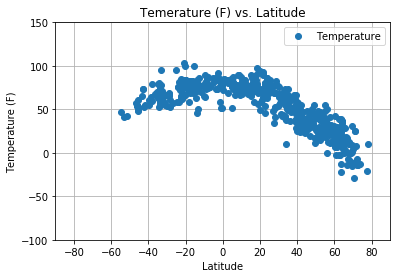

In [29]:
# Build a scatter plot for each data type

cities_df.plot(x ='Latitude', y='Temperature', style='o')

# Incorporate the other graph properties
plt.title("Temerature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-100,150])

# Save the figure
plt.savefig("Temperature-Lattitude.png")

# Show plot
plt.show()



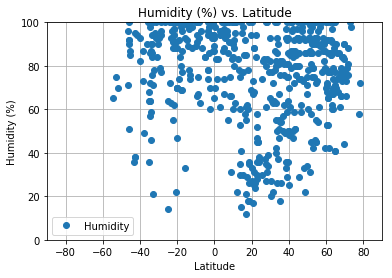

In [30]:
cities_df.plot(x ='Latitude', y ='Humidity', style='o')

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0,100])

# Save the figure
plt.savefig("Humidity-Latitude.png")

# Show plot
plt.show()


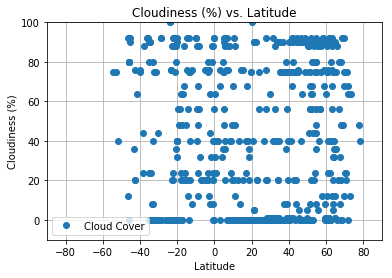

In [33]:
cities_df.plot(x ='Latitude', y ='Cloud Cover', style='o')

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10,100])

# Save the figure
plt.savefig("Cloudiness-Latitude.png")

# Show plot
plt.show()


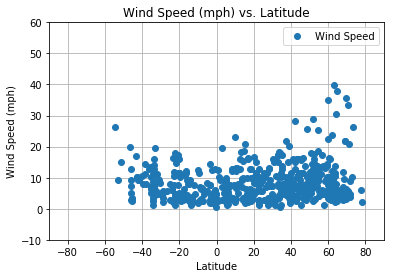

In [32]:
cities_df.plot(x ='Latitude', y ='Wind Speed', style='o')

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10,60])

# Save the figure
plt.savefig("WindSpeed-Latitude.png")

# Show plot
plt.show()
